<a href="https://colab.research.google.com/github/rzunick/MNA-Navegacion-Autonoma-Equipo-14/blob/main/3_1_Detecci%C3%B3n_de_Peatones_Equipo14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

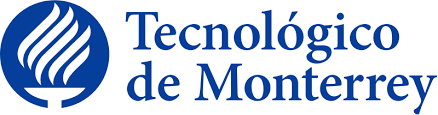

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Navegación autónoma**
## Profesor: David Antonio Torres
## Actividad 3.1 - Detección de Peatones con SVM
## **Equipo 14**: 
### - *Alejandro Juárez Corona-A01168444*
### - *Juan Carlos Lopez Cruz- A01793052*
### - *Ronald David Zúniga Sánchez-A01686240*
### - *Rodrigo López Aguilera-A01793071*

# **Introducción:**

**HOG**

**El histograma de gradientes orientados, también conocido como HOG**, es un descriptor de características como el Canny Edge Detector, SIFT (Scale Invariant and Feature Transform). Se utiliza en la visión artificial y el procesamiento de imágenes con el fin de detectar objetos. La técnica cuenta las ocurrencias de orientación de gradiente en la parte localizada de una imagen. Este método es bastante similar a los histogramas de orientación de borde y la transformación de una característica invariante de escala (SIFT). El descriptor HOG se centra en la estructura o la forma de un objeto. Es mejor que cualquier descriptor de borde, ya que utiliza la magnitud y el ángulo del gradiente para calcular las características. Para las regiones de la imagen genera histogramas usando la magnitud y orientaciones del gradiente.

**Pasos para calcular las características del HOG**:

1. Teniendo una imagen a color, se pasa a escala de grises.

2. Tras esto, se calculan los gradientes en la imagen completa.

3. Una vez calculados se divide la imagen en bloques, solapados cierta área. Para llevar a cabo el avance de bloques, se elimina la columna de las celdas de la izquierda y se van añadiendo en la columna de la derecha. Por otro lado, en el eje vertical, se eliminan las filas de las celdas superiores y se añaden filas inferiores.

4. Se dividen los bloques en sub-bloques o celdas.

5. Se calcula en cada uno de ellos el histograma de gradientes orientados

6. Se aplica una ventana gaussiana sobre cada bloque, y se almacena la información en un vector de características.

**SVM**

Las Máquinas Vectores de Soporte clasificación ofrece una precisión muy alta en comparación con otros clasificadores como la Regresión Logística y los Árboles de Decisión. Es conocido por su truco de kernel para manejar espacios de entrada no lineales. Se utiliza una variedad de aplicaciones tales como detección de rostros, detección de intrusos, clasificación de correos electrónicos, artículos de noticias y páginas web, entre otros.

El SVM, por sus siglas en inglés, construye un hiperplano en un espacio multidimensional para separar las diferentes clases. El SVM genera un hiperplano óptimo de forma iterativa, que se utiliza para minimizar un error. La idea central de SVM es encontrar un hiperplano marginal máximo que mejor divida el conjunto de datos en clases.

* **Ventajas:** 
Los clasificadores de Máquinas de Vectores de Soporte ofrecen una buena precisión y realizan predicciones más rápidas en comparación con el algoritmo de Naive Bayes. También utilizan menos memoria porque utilizan un subconjunto de puntos de entrenamiento en la fase de decisión. Este algoritmo funciona bien con un claro margen de separación y con un espacio dimensional elevado.

* **Desventajas:** 
Las Máquinas de Vectores de Soporte no son adecuadas para grandes conjuntos de datos debido a su alto tiempo de formación y también requiere más tiempo de formación en comparación con Naive Bayes. Funciona mal con clases superpuestas y también es sensible al tipo de núcleo utilizado.

# Librerías a utilizar

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import cv2 
from skimage.feature import hog # libreria para el calculo de las caracteristicas HoG
import glob #Libreria para importar los data sets. https://docs.python.org/3/library/glob.html

#Librerías  para Aprendizaje automatico.
from sklearn.svm import SVC # Para el modelo de máquina de soporte vectorial
from sklearn.model_selection import train_test_split # Para separar los conjuntos de entrenamiento y prueba
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix # Matriz de confusión

## **Activación del drive para leer las imágenes.**

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#Código para importar carpeta de imágenes en Git-Hub
!git clone https://github.com/rzunick/MNA-Navegacion-Autonoma-Equipo-14.git

# Modificar las rutas locales incluyendo: /content/MNA-Navegacion-Autonoma-Equipo-14/

Cloning into 'MNA-Navegacion-Autonoma-Equipo-14'...
remote: Enumerating objects: 1066, done.
remote: Counting objects: 100% (756/756), done.
remote: Compressing objects: 100% (747/747), done.
remote: Total 1066 (delta 21), reused 515 (delta 9), pack-reused 310
Receiving objects: 100% (1066/1066), 21.09 MiB | 12.08 MiB/s, done.
Resolving deltas: 100% (41/41), done.


### Datasets de peatones y no peatones del repositorio del libro opencv-machine-learning: https://github.com/mbeyeler/opencv-machine-learning/tree/master/notebooks/data/chapter6

In [7]:
# Importar direcciones de imagenes en variable interna
peaton = glob.glob("/content/MNA-Navegacion-Autonoma-Equipo-14/data/pedestrians128x64/*.ppm")
no_peaton = glob.glob("/content/MNA-Navegacion-Autonoma-Equipo-14/data/pedestrians_neg/*.jpg")

In [8]:
print("Cantidad de imagenes de peatones:",len(peaton))

Cantidad de imagenes de peatones: 924


In [9]:
print("Cantidad de imagenes de no peatones:",len(no_peaton))

Cantidad de imagenes de no peatones: 50


# **Ejemplo de una imagen del data set  un peatones y extracción de características con HOG.**

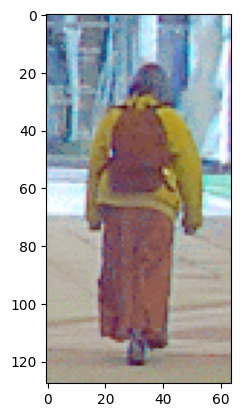

In [12]:
img_color = cv2.imread(peaton[170])
plt.imshow(img_color)

In [13]:
img_color.shape

(128, 64, 3)

**Observaciones:**
Las dimensiones de las imágenes de peatones se pueden quedar con las dimensiones que tienen por default ya que esto ayudara más adelante en el proceso de extracción de las características de los peatones en la imagen.

## **Demostración de el calculo de HOG de la imagen de un peaton**

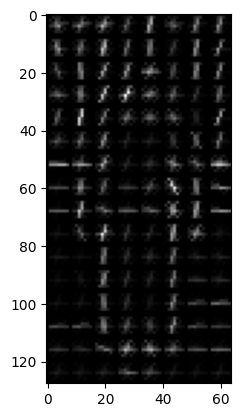

In [20]:
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
features,hog_img = hog(img_gray,
                       orientations = 11,
                       pixels_per_cell = (8,8),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)
plt.imshow(hog_img,cmap = 'gray')

**Nota:**

A diferencia del detector de coches para el caso de los peatones se tuvo que disminuir el parámetro de pixel_per_cell  de 16x16 a 8x8 debido a que no se distinguía bien el peatón.


# **Ejemplo de una imagen del data set  no peatones y extracción de características con HOG.**

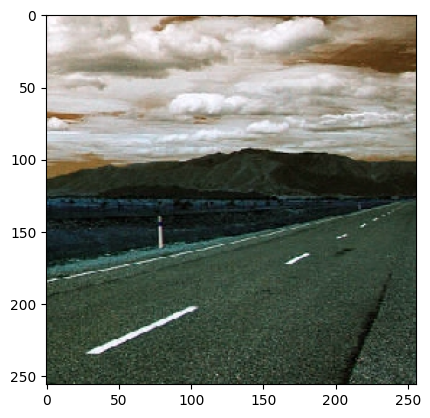

In [26]:
img_color2 = cv2.imread(no_peaton[0])
plt.imshow(img_color2)

In [27]:
img_color2.shape

(256, 256, 3)

**Observaciones:** 
Las imagenes se deben del data set de no_peaton se deben redimensionar a las dimensiones que tienen las imagenes de peatones.

## **Demostración de el calculo de HOG de la imagen de un no peaton**

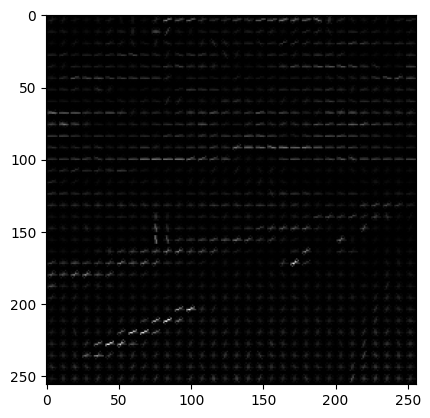

In [28]:
img_gray2 = cv2.cvtColor(img_color2,cv2.COLOR_BGR2GRAY)
features,hog_img2 = hog(img_gray2,
                       orientations = 11,
                       pixels_per_cell = (8,8),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)
plt.imshow(hog_img2,cmap = 'gray')

# **Extracción de las características de HOG**

## **Data set Peatones**

In [29]:
peaton_hog_accum = []

for i in peaton:
    img_color = mpimg.imread(i)
    img_color=cv2.resize(img_color,(64,128), interpolation = cv2.INTER_AREA)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)  # Paso 1
    
    peaton_hog_feature, peaton_hog_img = hog(img_gray,
                                               orientations = 11,
                                               pixels_per_cell = (8,8),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    peaton_hog_accum.append(peaton_hog_feature)

**Observaciones:**

Es importante explicar la razón por la que los parámetros escogidos para la detección de peatones en este data set no cambiaron en comparación con los parámetros explicados por el profesor para el Código en la detección de vehículos.
- Gradientes y orientaciones: El algoritmo de HOG permite capturar bordes e información de texturas de una imagen basadas en la orientación de gradientes. Los peatones al igual que los vehículos tienen una forma muy peculiar en cuanto al cuerpo y la ropa que pueden llevar puesta. Esto permite que los gradientes sean representados de una forma muy significativa y es por esto por lo que las características que permiten obtener información sobre un vehículo sean también aplicables para obtener las mismas características de un peatón.
- Otro punto a considerar es el espacio de resolución, al dividir la imagen en celdas de 8x8 pixeles y agrupándolas en bloques de 2x2 permite capturar variaciones de gradientes locales mientras se mantiene un espacio de resolución razonable. Los peatones suelen exhibir características distinguibles a esta escala por las partes de los cuerpos y los patrones de la ropa que llevan puesta lo cual ayuda a la precisión de detección de estos.
- Como las características se alimentarán a una máquina de vectorial de soporte, este tipo de modelos es muy popular para tareas de detección de objetos, entre ellos incluidos vehículos y peatones. SVMs (por sus siglas en inglés) pueden aprender limites complejos y manejar datos de alta dimensionalidad lo cual produce muy buenos resultados. Al entrenar una SVM con características ya sean de vehículos o peatones, las características de este último son igual de importantes puesto que ayudan a reconocer patrones indiscriminados.

In [30]:
X_peaton = np.vstack(peaton_hog_accum).astype(np.float64)
y_peaton = np.ones(len(X_peaton))

In [31]:
X_peaton.shape

(924, 4620)

In [32]:
y_peaton.shape

(924,)

**Observaciones:**
Se cuentan con 924 imágenes para el set de datos que representan los que son peatones.

## **Data set No Peatones**

In [33]:
no_peaton_hog_accum = []

for i in no_peaton:
    img_color = mpimg.imread(i)
    img_color=cv2.resize(img_color,(64,128), interpolation = cv2.INTER_AREA)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    no_peaton_hog_feature, no_peaton_hog_img = hog(img_gray,
                                               orientations = 11,
                                               pixels_per_cell = (8,8),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    no_peaton_hog_accum.append(no_peaton_hog_feature)

**Observaciones:**

La razón por la que los mismos parámetros son utilizados para imágenes que no contienen peatones es para asegurarse de que las características que se quieren obtener de todas las imágenes tienen consistencia y comparabilidad entre imágenes. además, se mantiene una generalización para inclusive datos que no han sido usados para entrenarse al modelo. Esto permite que no haya un sobre entrenamiento del modelo y pueda generalizar bien. Por otra parte, también permite que haya una comparación justa entre ambos tipos de imágenes, los que tienen peatones y las que no, en el sentido de que asegura que la decisión del modelo sobre si hay o no peatones es por la razón misma de que el HOG encontró o no características de un peatón.

In [34]:
X_no_peaton = np.vstack(no_peaton_hog_accum).astype(np.float64)
y_no_peaton = np.zeros(len(X_no_peaton))

In [35]:
X_no_peaton.shape

(50, 4620)

In [36]:
y_no_peaton.shape

(50,)

**Observaciones:**
Se cuentan con 50 imágenes para el set de datos que representan los que son peatones.

# **Combinación de tipos de datos para alimentar el SVM.**

In [37]:
X = np.vstack((X_peaton,X_no_peaton))
X.shape

(974, 4620)

In [38]:
y = np.hstack((y_peaton,y_no_peaton))
y.shape

(974,)

**Observaciones:**
Se cuentan con 974 imágenes 924 para el set de datos que representan los que son peatones y 50 para los que no son.

# **Generación de los datos de entrenamiento y de prueba**

In [39]:
# Se generan los splits para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [40]:
X_train.shape

(681, 4620)

In [41]:
X_test.shape

(293, 4620)

#  **Creación y entrenamiento de Modelo de aprendizaje Clasificador de Maquina de Vectorial de Soporte.**

In [44]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [45]:
y_predict = svc_model.predict(X_test)

##  **Matriz de confusión.**

<Axes: >

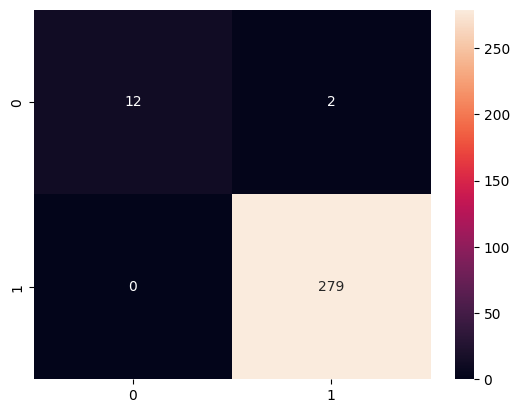

In [46]:
# Creación de Matriz de Confusión 1
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

**Observaciones:**

De primera instancia se observa que al menos con los parámetros por default del modelo este regresa resultados muy buenos puesto que casi no hay falsos-positivos y falsos-negativos


In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        14
         1.0       0.99      1.00      1.00       279

    accuracy                           0.99       293
   macro avg       1.00      0.93      0.96       293
weighted avg       0.99      0.99      0.99       293



# **Búsqueda de los mejores parámetros del Modelo SVC con GridSearchCV**

Para esta parte se encontrarán los parámetros óptimos con los cuales se tendrá el modelo con los mejores resultados de rendimiento.

In [48]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [49]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.949 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.949 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.949 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.949 total time=   0.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.942 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [50]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Los parámetros óptimos que se usaran para evaluar el modelo de aprendizaje.

In [51]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [52]:
grid_predictions = grid.predict(X_test)

<Axes: >

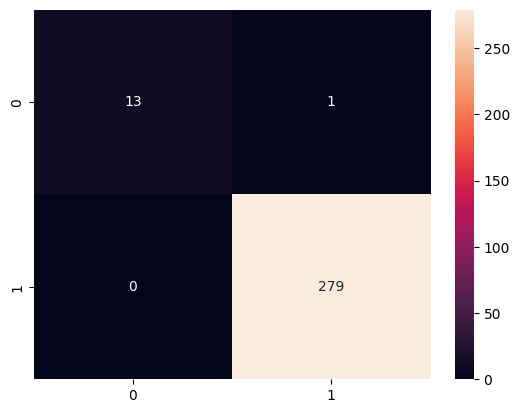

In [53]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [54]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       1.00      1.00      1.00       279

    accuracy                           1.00       293
   macro avg       1.00      0.96      0.98       293
weighted avg       1.00      1.00      1.00       293



**Observaciones:**

Se puede observar que al menos para este data set, se obtuvieron resultados iguales que con el modelo con parámetros de default y el modelo con los parametros resultado GridSearch CV. Esto puede ser un indicador que el modelo esta sobreentrenado, pero es muy temprano para llegar a tales conclusiones. Habría que probar el mismo modelo en otro data set independiente para observar si verdaderamente hubo un sobre entrenamiento, pero es importante destacar que el modelo SVM simplemente está haciendo un muy buen trabajo separando limites lo cual permite que tenga un excelente rendimiento.

#**Conclusiones:**
Como se pudo observar en esta práctica los histogramas de gradientes orientados, también conocido como HOG son muy útiles para detectar características de las imágenes para esta práctica de detección de peatones y la práctica de detección de vehículos, el uso de esta técnica es muy bueno ya que si es capaz de hacer que un modelo de aprendizaje automático como lo es Las Máquinas Vectores de Soporte realice una buena predicción.
Solo se tuvo que cambiar el pixel_per_cell de 16x16 a 8x8 debido a que no se distinguía bien el peatón en las imágenes y se obtuvo mejores resultados.

Como bien se menciono el modelo de entramiento mostro los mismos resultados con los parámetros por default que con los Best_params que gridSearchCV busco esto es porque esta función busca el máximo score para un modelo, pero no considera un punto importante como lo es si el modelo esta sobre entrenado o no, para esto deberíamos comparar el acurracy del conjunto de entrenamiento contra uno de validación para determinar que tanto es el gap que se tiene.
Ya que por otro lado la matriz de confusión mostro muy pocos falsos positivos y muy pocos falsos negativos.

Por otro lado, las clases no están balanceadas ya que se utilizaron 924 imágenes de peatones contra 50 imágenes de no peatones, tal vez como un trabajo a futuro seria intentar balancear la cantidad de no peatones con la de peatones y probar con otros data sets para evaluar que tan robusto es esta forma de detectar peatones y si puede aplicarse en algún vehículo autónomo.


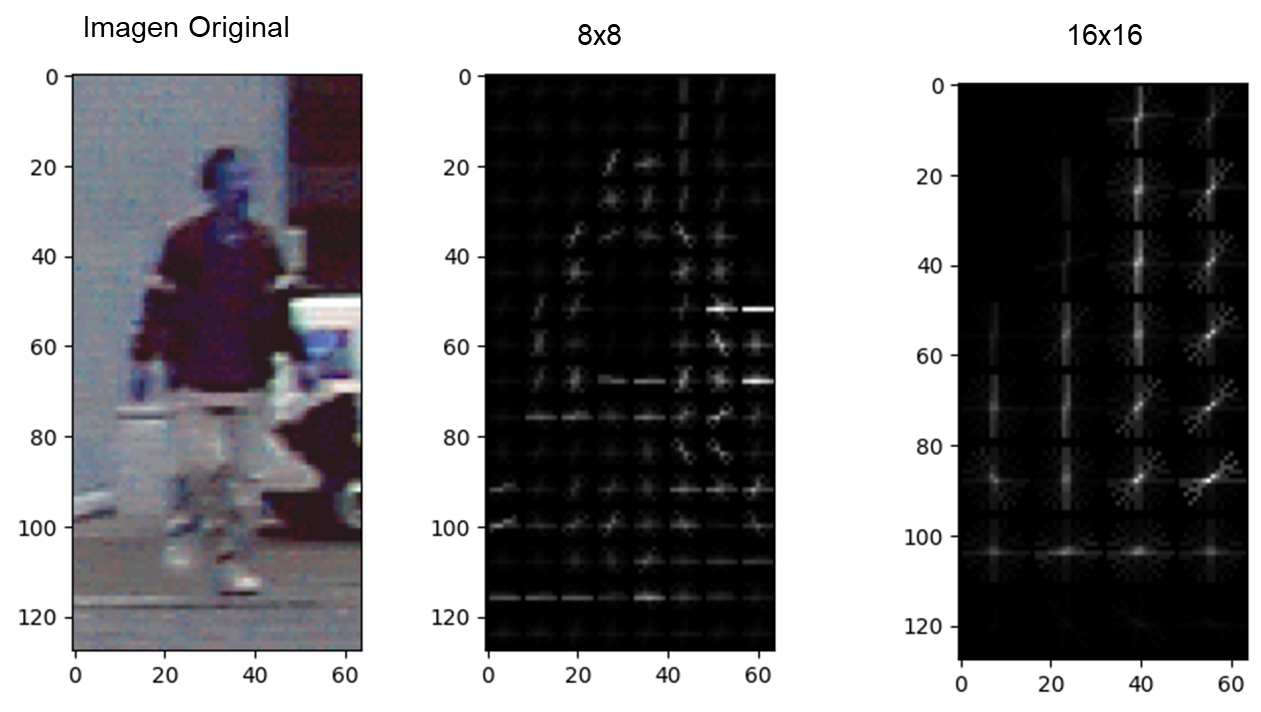

# Video Resumen

Una breve explicación del presente código puede ser encontrada en: https://youtu.be/56ocjT3qWJ0

# **Referencias:**
- Ramos Alonso, J.A. (2016). Generación de algoritmos para clasificación de obstáculos.[Trabajo de Fin de Grado, Universidad Carlos III de Madrid]. Library. https://1library.co/document/q7506nnz-generacion-de-algoritmos-para-clasificacion-de-obstaculos.html

- Aprendeia.(s.f.).  Máquinas Vectores de Soporte. https://aprendeia.com/maquinas-vectores-de-soporte-clasificacion-teoria/

- Scikit-image. (s.f.). Histogram of Oriented Gradients. https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

- Python Software Foundation.glob — Unix style pathname pattern expansion. https://docs.python.org/3/library/glob.html

- Beyeler. M. (2017). opencv-machine-learning/notebooks/data/chapter6. Github. https://github.com/mbeyeler/opencv-machine-learning/tree/master/notebooks/data/chapter6